In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Attribute Information


In [3]:
df=pd.read_csv("haberman.csv")
df

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [4]:
df.shape

(306, 4)

In [5]:
df.isna().sum()       # no NAN values in the dataset

age       0
year      0
nodes     0
status    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [7]:
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [8]:
df['status']=df['status'].map({1:'Yes', 2:'No'})

In [9]:
df.head()

,age,year,nodes,status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


# conversions
* Here i have changed the 1 in status as Yes and 2 in status as No
  so as to give a clear understanding of whether the patient lived for more than 5 years or not 

In [10]:
df['status'].value_counts()

Yes    225
No      81
Name: status, dtype: int64

# observation

 * the data is imbalanced

# univariate analysis
 * PDF
 

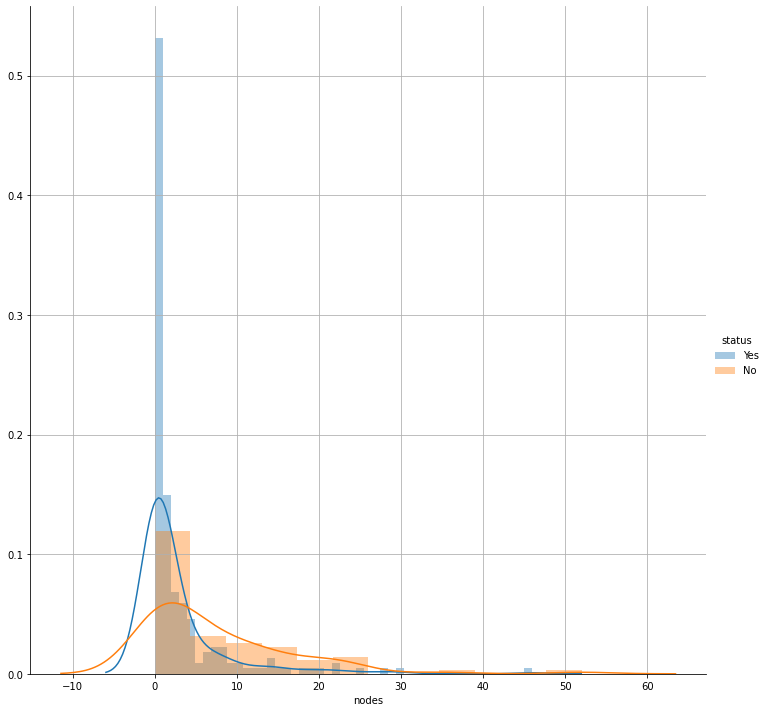

In [11]:
sns.FacetGrid(df,height=10,hue='status')\
   .map(sns.distplot, 'nodes')\
   .add_legend();
plt.grid()
plt.show()


# Takeaways:-

* Higest survival rates were of patients having nodes between 0 to 5 
* For nodes greater than 15 the chance of survival decreases drastically

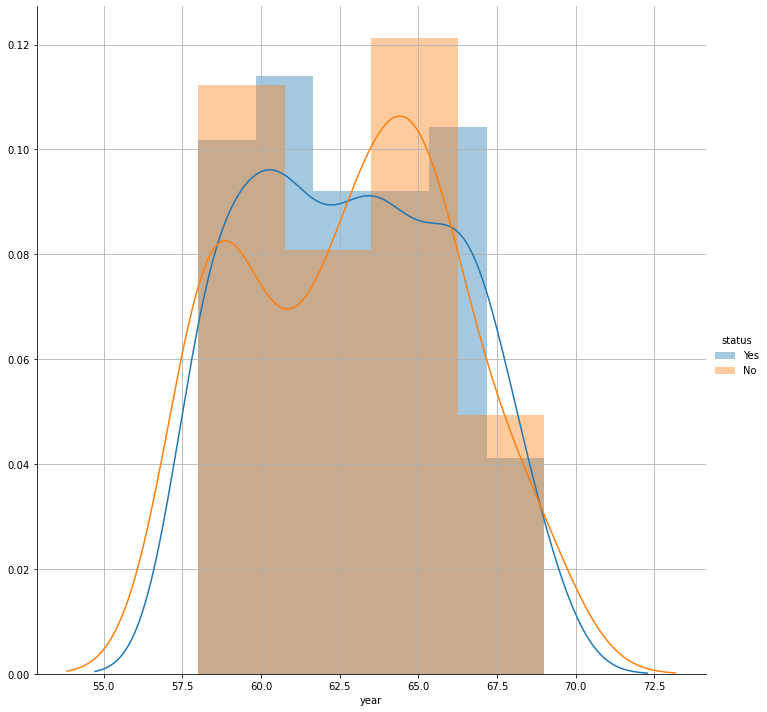

In [12]:
sns.FacetGrid(df,hue='status',height = 10)\
 .map(sns.distplot,'year')\
 . add_legend();
plt.grid()
plt.show()

# Takeaways:-
 * distribution plots completely overlaps this shows that year of operation done is independent of the status of patients
 

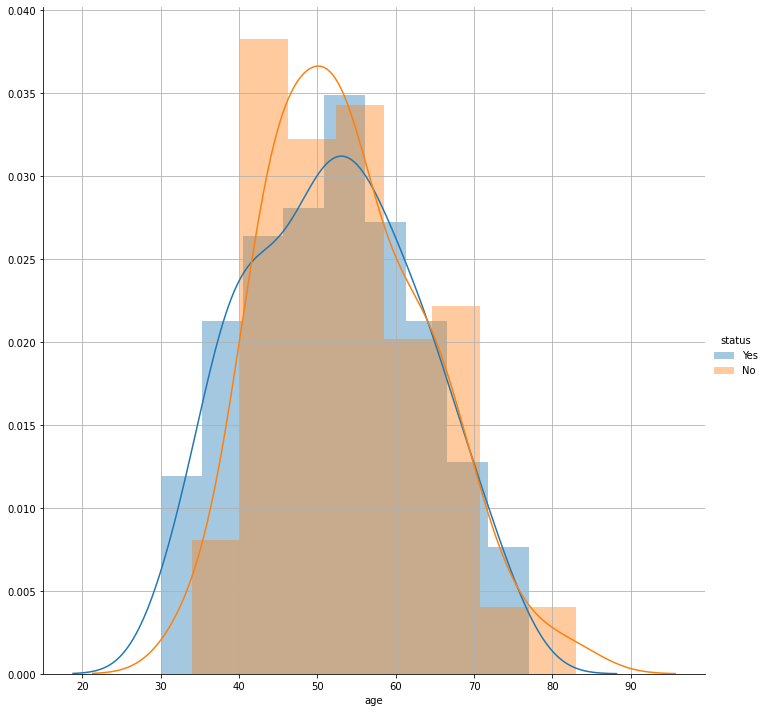

In [13]:
sns.FacetGrid(df,hue='status',height = 10)\
 .map(sns.distplot,'age')\
 . add_legend();
plt.grid()
plt.show()

# Takeaways:-
* in between 40-50 years of age their is more likely outcome of status NO( i,e more death rate)
* age also has an overlap of data 


# CDF


In [18]:
alive = df[df['status'] == 'Yes']
notalive = df[df['status'] == 'No']

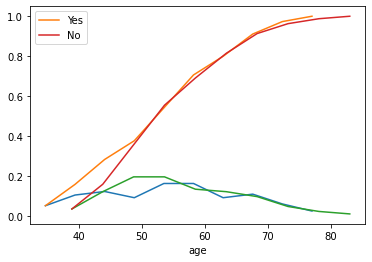

In [19]:
counts,bin_edges = np.histogram(alive['age'],bins=10,density=True)
pdf= counts/(sum(counts))

cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf, label = 'Yes')
plt.xlabel('age')

counts1, bin_edges1 = np.histogram(notalive['age'], bins=10, density = True)
pdf1 = counts1/(sum(counts1))

cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:], pdf1)
plt.plot(bin_edges1[1:], cdf1, label = 'No')
plt.xlabel('age')

plt.legend()
plt.show()


# Takeaways:-
* For the people having age less than 49 yrs their is a 30-35% chance of being alive
* Between age 55 to 75 their is a equal chance of being alive and  being not alive 

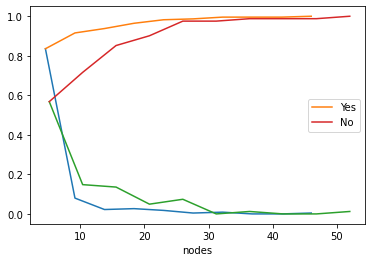

In [20]:
counts,bin_edges = np.histogram(alive['nodes'],bins=10,density=True)
pdf= counts/(sum(counts))

cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf, label = 'Yes')
plt.xlabel('nodes')

counts1, bin_edges1 = np.histogram(notalive['nodes'], bins=10, density = True)
pdf1 = counts1/(sum(counts1))

cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:], pdf1)
plt.plot(bin_edges1[1:], cdf1, label = 'No')
plt.xlabel('nodes')

plt.legend()
plt.show()


# Takeaways:-
* 90% of people having nodes less than 25 have a higher chance of being alive


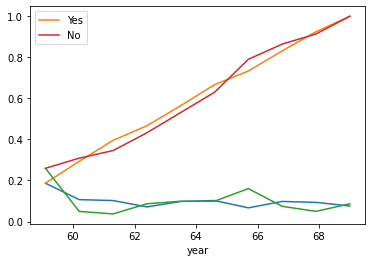

In [21]:
counts,bin_edges = np.histogram(alive['year'],bins=10,density=True)
pdf= counts/(sum(counts))

cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf, label = 'Yes')
plt.xlabel('year')

counts1, bin_edges1 = np.histogram(notalive['year'], bins=10, density = True)
pdf1 = counts1/(sum(counts1))

cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:], pdf1)
plt.plot(bin_edges1[1:], cdf1, label = 'No')
plt.xlabel('year')

plt.legend()
plt.show()

# Takeaways:-
* For the people taking operations in  between the years (1950-1961) and (1965-1967) had a higher chance of nonsurvival  

# Box plots:- 

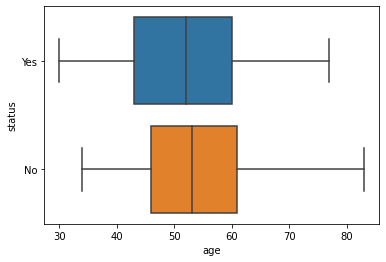

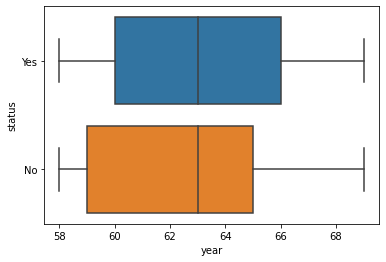

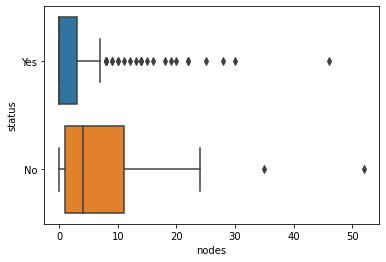

In [24]:
sns.boxplot(y='status',x='age',data=df)
plt.show()
sns.boxplot(y='status',x='year',data=df)
plt.show()
sns.boxplot(y='status',x='nodes',data=df)
plt.show()

# Takeaways :-
* On looking at the node box plot we can say that people having nodes less than 4 have more chance of being alive
* 25 percentile of people having age around 45 have chance of survival


# violin plots


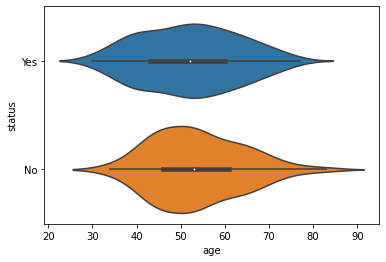

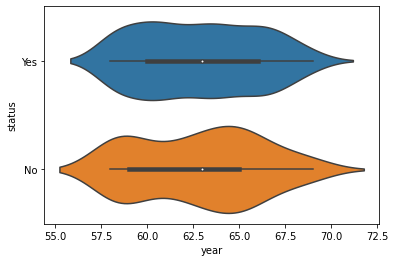

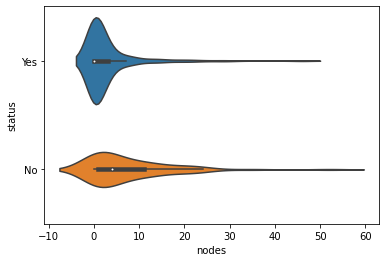

In [25]:
sns.violinplot(x='age',y='status',height =10, data=df)
plt.show()
sns.violinplot(y='status',x='year',data = df,height = 10)
plt.show()
sns.violinplot(y='status',x='nodes',data = df,height = 10)
plt.show()

# Takeaways:-
* On looking at the node violin plot we can say that people having nodes around (0-4) have more chance of being alive
* other features are overlapping mostly so difficult to say anything


BI-variate analysis

# pair plots :-

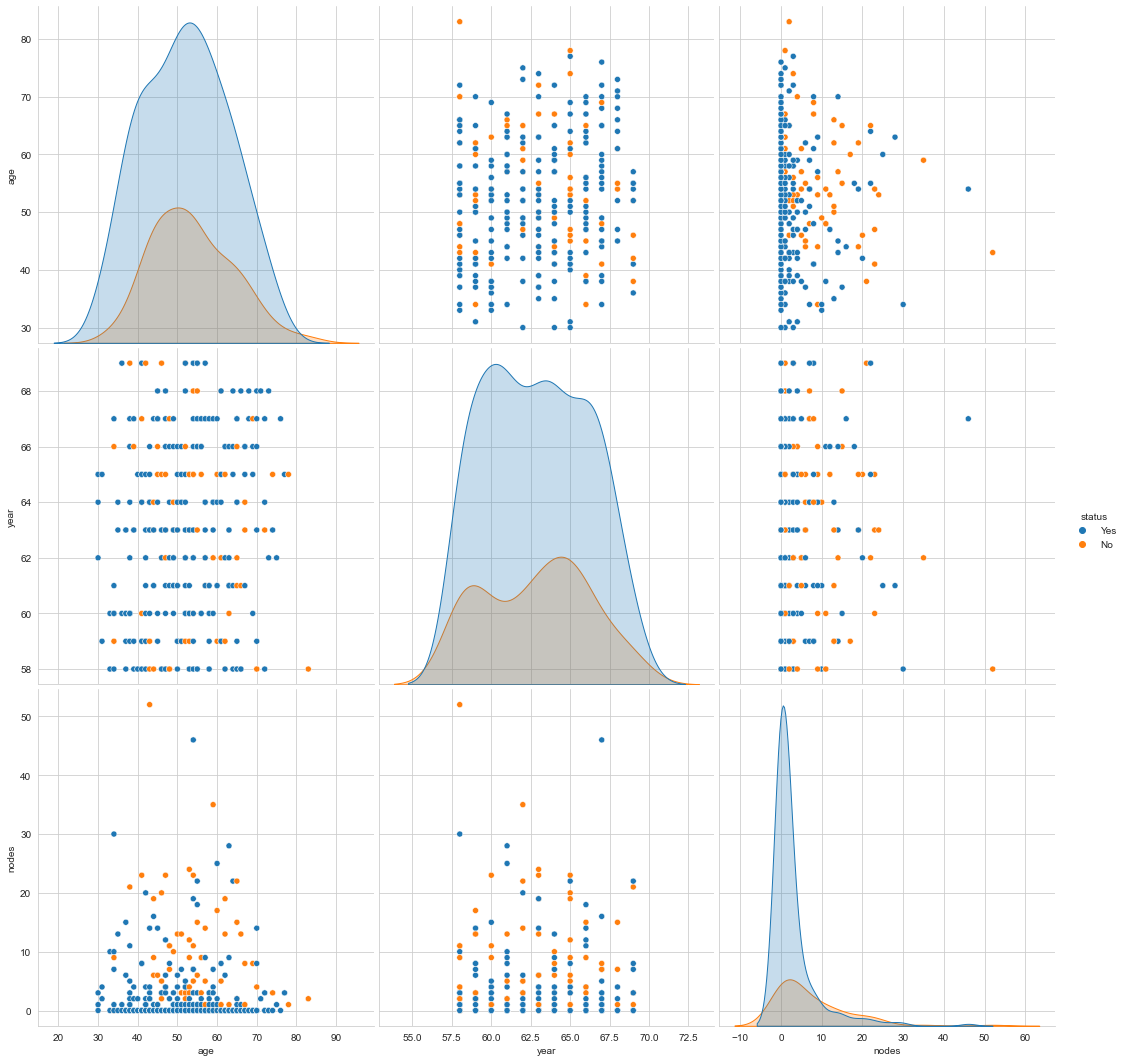

In [31]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(df,hue="status",height=5)
plt.show()


# Takeaways:-
* for the year of operation from 1957-1970 and age less than 40 people had a higher chance of being alive
* for all the age groups and having node count as zero the chances of survival was highest


# scatter plots:-


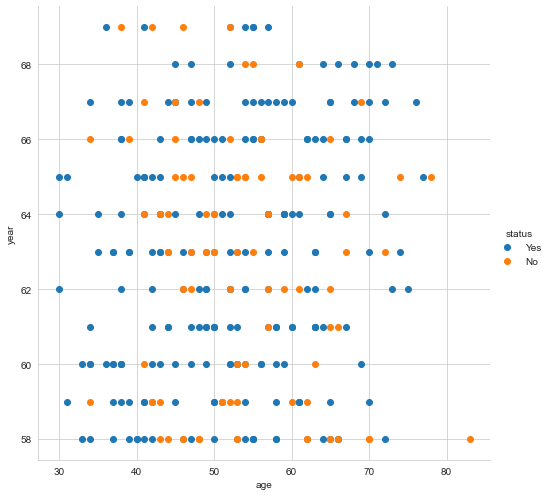

In [37]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='status',height=7)\
.map(plt.scatter,'age','year')\
 .add_legend()
plt.show()


* for age less than 40 and any year of operation the survival chances are greater

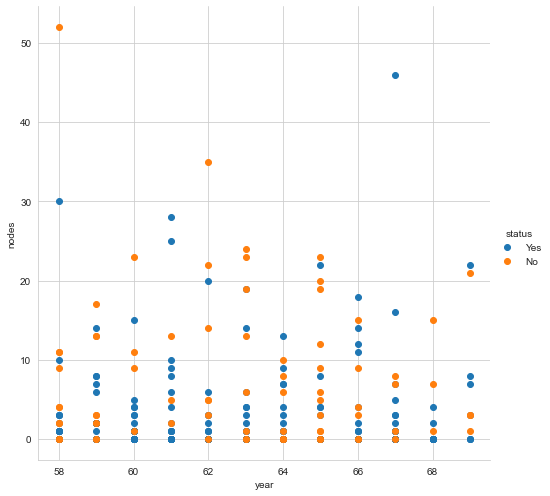

In [39]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'status' , height = 7)\
 .map(plt.scatter,'year','nodes')\
 .add_legend()
plt.show()

* no much information from the plot of year and nodes scatter plot

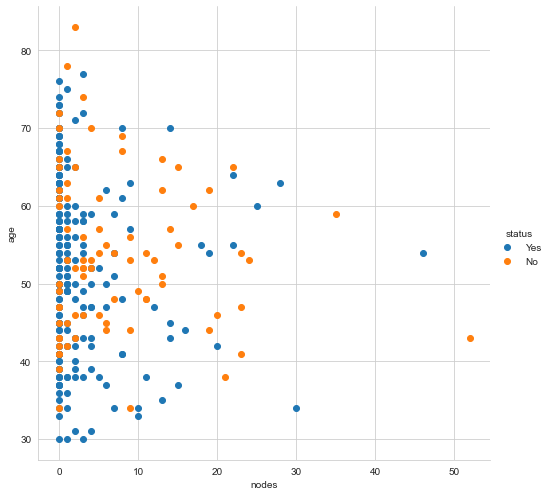

In [38]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'status' , height = 7)\
 .map(plt.scatter,'nodes','age')\
 .add_legend()
plt.show()

* for nodes less than 4 and age between 52-59 the chance of being alive is more
* for age less than 40 chances of survival are more

# Final conclusions :-

* People haing less number of nodes have definately a higher chance of survival.
* Box plot, violin plot were not a good choice for analysis of data.
* In case of distribution plots only number of nodes feature gave us a good idea about the status of patients.
* people with less age groups showed higher survival rates.
* year of operation seems to be less important feature for prediction of status of patient.


# Thank you